# Initialize Spark session

In [1]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from os.path import abspath
import os

# SparkSession
URL_SPARK = "spark://spark-master:7077"
warehouse_location = './spark-warehouse'

spark = (
    SparkSession.builder
    .appName("spark-ml-multiVM")
    .config("executor.memory", "8g")
    .config("spark.sql.warehouse.dir", warehouse_location)
    .master(URL_SPARK)
    .getOrCreate()
)

/usr/local/lib/python3.9/dist-packages/pyspark/bin/load-spark-env.sh: line 68: ps: command not found
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/06/21 20:18:59 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


# Load the stored spark batch dataset of multiVM
- we will load the joined dataset of multiVMs

In [2]:
from pyspark.sql.functions import *
path = './spark-warehouse/mondb.db/bronze_vmlog_join'
df = spark.read.format('parquet').options(header=True,inferSchema=True).load(path)

In [3]:
df.count()

21274

In [4]:
df.show()

+-------------------+-------+----------+-----------+-------+----------+-----------+
|          timestamp|cpu_vm1|memory_vm1|storage_vm1|cpu_vm2|memory_vm2|storage_vm2|
+-------------------+-------+----------+-----------+-------+----------+-----------+
|2023-06-18 22:48:00|   0.23|     43.08|       45.0|    NaN|       NaN|        NaN|
|2023-06-18 22:49:00|   0.38|     43.08|       45.0|    NaN|       NaN|        NaN|
|2023-06-18 22:50:00|   0.29|     43.09|       45.0|    NaN|       NaN|        NaN|
|2023-06-18 22:51:01|   0.23|     43.09|       45.0|    NaN|       NaN|        NaN|
|2023-06-18 22:52:01|   0.45|     43.09|       45.0|    NaN|       NaN|        NaN|
|2023-06-18 22:53:01|   0.22|     43.09|       45.0|    NaN|       NaN|        NaN|
|2023-06-18 22:54:01|   0.08|     43.08|       45.0|    NaN|       NaN|        NaN|
|2023-06-18 22:55:01|   0.14|     43.09|       45.0|    NaN|       NaN|        NaN|
|2023-06-18 22:56:02|    0.2|     43.09|       45.0|    NaN|       NaN|     

# Convert to pandas dataframe and set time stamp as index

In [5]:
import pandas as pd
pd_df = df.toPandas()

/usr/local/lib/python3.9/dist-packages/pyspark/sql/pandas/conversion.py:194: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


In [6]:
pd_df['timestamp'] = pd.to_datetime(pd_df['timestamp'],format='%d-%m-%y %I:%M:%S %p').dt.strftime('%Y-%m-%d %H:%M:%S')
pd_df['timestamp'] = pd.to_datetime(pd_df['timestamp'])
pd_df.apply(pd.to_numeric, errors='ignore')
pd_df.set_index('timestamp',inplace=True)

In [7]:
pd_df

,cpu_vm1,memory_vm1,storage_vm1,cpu_vm2,memory_vm2,storage_vm2
timestamp,,,,,,
2023-06-18 22:48:00,0.23,43.08,45.0,NaN,NaN,NaN
2023-06-18 22:49:00,0.38,43.08,45.0,NaN,NaN,NaN
2023-06-18 22:50:00,0.29,43.09,45.0,NaN,NaN,NaN
2023-06-18 22:51:01,0.23,43.09,45.0,NaN,NaN,NaN
2023-06-18 22:52:01,0.45,43.09,45.0,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-06-18 22:42:59,0.36,43.08,45.0,NaN,NaN,NaN
2023-06-18 22:43:59,0.34,43.08,45.0,NaN,NaN,NaN
2023-06-18 22:44:59,0.52,43.08,45.0,NaN,NaN,NaN


In [9]:
pd_df = pd_df.sort_index()

In [11]:
pd_df

,cpu_vm1,memory_vm1,storage_vm1,cpu_vm2,memory_vm2,storage_vm2
timestamp,,,,,,
2023-06-06 19:52:17,0.12,36.06,25.0,NaN,NaN,NaN
2023-06-06 19:52:22,0.11,35.99,25.0,NaN,NaN,NaN
2023-06-06 19:52:27,0.10,35.99,25.0,NaN,NaN,NaN
2023-06-06 19:52:40,0.09,35.98,25.0,NaN,NaN,NaN
2023-06-06 19:52:45,0.07,35.98,25.0,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-06-21 08:24:00,NaN,NaN,NaN,0.02,15.21,86.0
2023-06-21 08:25:00,NaN,NaN,NaN,0.01,15.21,86.0
2023-06-21 08:26:00,NaN,NaN,NaN,0.00,15.19,86.0


# Clean data
- two joined time series have mismatch time stamps since the data was generated at different times.
- Impute the missing values: fill the NAN values by interpolate method

In [12]:
nan_count = pd_df.isna().sum().sum() #count nan values in whole dataframe
print(nan_count)

63735


In [18]:
print('% nan values in whole dataframe:',nan_count/(21274*6)) # percent of nan values in whole dataframe

% nan values in whole dataframe: 0.4993184168468553


In [20]:
nan_cpu_vm1 = pd_df['cpu_vm1'].isna().sum() #count nan values in column cpu of vm1
print('% nan values in column cpu_vm1:',nan_cpu_vm1/len(pd_df)) #% nan values in column cpu of vm1
print('% nan values in column cpu_vm2:',pd_df['cpu_vm2'].isna().sum()/len(pd_df)) #% nan values in column cpu of vm2

% nan values in column cpu_vm1: 0.11615117044279402
% nan values in column cpu_vm2: 0.8824856632509166


In [27]:
filled_df = pd_df.interpolate(method='ffill').interpolate(method='bfill')

In [28]:
filled_df

,cpu_vm1,memory_vm1,storage_vm1,cpu_vm2,memory_vm2,storage_vm2
timestamp,,,,,,
2023-06-06 19:52:17,0.12,36.06,25.0,0.00,15.18,86.0
2023-06-06 19:52:22,0.11,35.99,25.0,0.00,15.18,86.0
2023-06-06 19:52:27,0.10,35.99,25.0,0.00,15.18,86.0
2023-06-06 19:52:40,0.09,35.98,25.0,0.00,15.18,86.0
2023-06-06 19:52:45,0.07,35.98,25.0,0.00,15.18,86.0
...,...,...,...,...,...,...
2023-06-21 08:24:00,0.06,44.20,46.0,0.02,15.21,86.0
2023-06-21 08:25:00,0.06,44.20,46.0,0.01,15.21,86.0
2023-06-21 08:26:00,0.06,44.20,46.0,0.00,15.19,86.0


In [31]:
nan_cpu_vm1 = filled_df['cpu_vm1'].isna().sum() #count nan values in column cpu of vm1
print('% nan values in column cpu_vm1:',nan_cpu_vm1/len(filled_df)) #% nan values in column cpu of vm1
nan_cpu_vm2 = filled_df['cpu_vm2'].isna().sum() #count nan values in column cpu of vm2
print('% nan values in column cpu_vm2:',nan_cpu_vm2/len(filled_df)) #% nan values in column cpu of vm2

% nan values in column cpu_vm1: 0.0
% nan values in column cpu_vm2: 0.0


# Visualization data
### Identify the trend of workload multi-timeseries hourly:
1. Data is resampled and averaged each hour. This allows to get a broader picture of VM's activity
2. Moving averages smooth the data so we can observe trends/patterns in the data.

In [76]:
print(filled_df['cpu_vm2'].isna().sum())
hour_df = filled_df.resample('H').mean()
nan_count = hour_df['cpu_vm2'].isna().sum()
print(nan_count)
hour_df_filled = hour_df.fillna(method='ffill')
nan_count = hour_df_filled['cpu_vm2'].isna().sum()
print(nan_count)
rolling_mean = filled_df.rolling(window='3600s').mean()

0
43
0


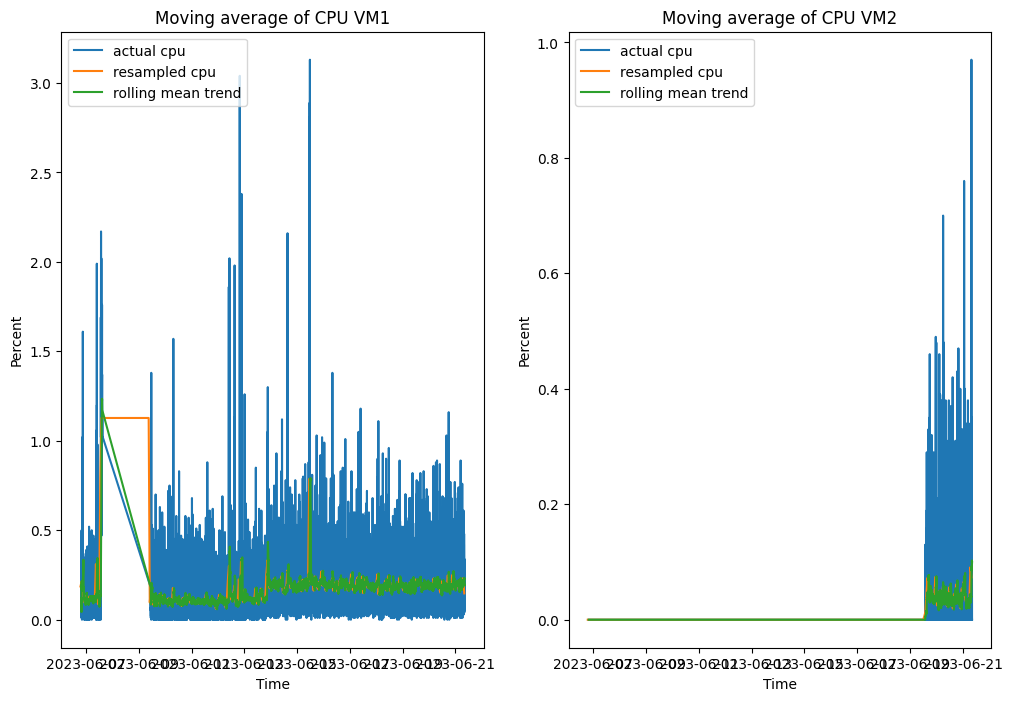

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
n_vm =2
for i in range(0,n_vm):
    plt.subplot(1,n_vm,i+1)
    plt.plot(filled_df['cpu_vm'+str(i+1)])
    plt.plot(hour_df_filled['cpu_vm'+str(i+1)])
    plt.plot(rolling_mean['cpu_vm'+str(i+1)])
    plt.xlabel('Time')
    plt.ylabel('Percent')
    plt.legend(['actual cpu','resampled cpu','rolling mean trend'])
    plt.title('Moving average of CPU VM'+str(i+1))

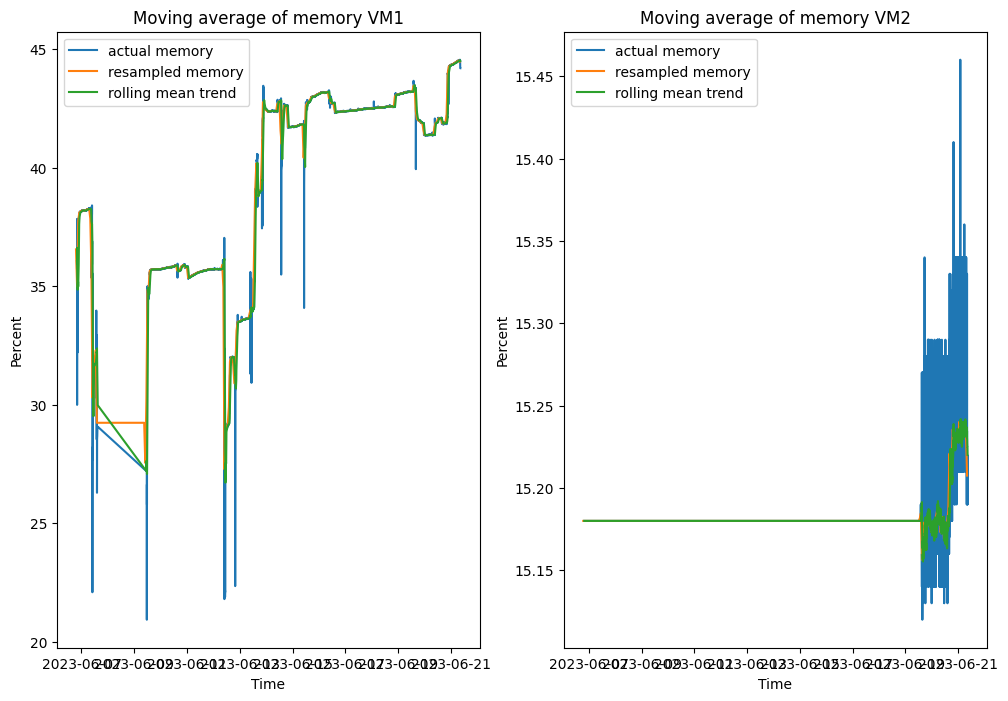

In [93]:
plt.figure(figsize=(12, 8))
n_vm =2
for i in range(0,n_vm):
    plt.subplot(1,n_vm,i+1)
    plt.plot(filled_df['memory_vm'+str(i+1)])
    plt.plot(hour_df_filled['memory_vm'+str(i+1)])
    plt.plot(rolling_mean['memory_vm'+str(i+1)])
    plt.xlabel('Time')
    plt.ylabel('Percent')
    plt.legend(['actual memory','resampled memory','rolling mean trend'])
    plt.title('Moving average of memory VM'+str(i+1))

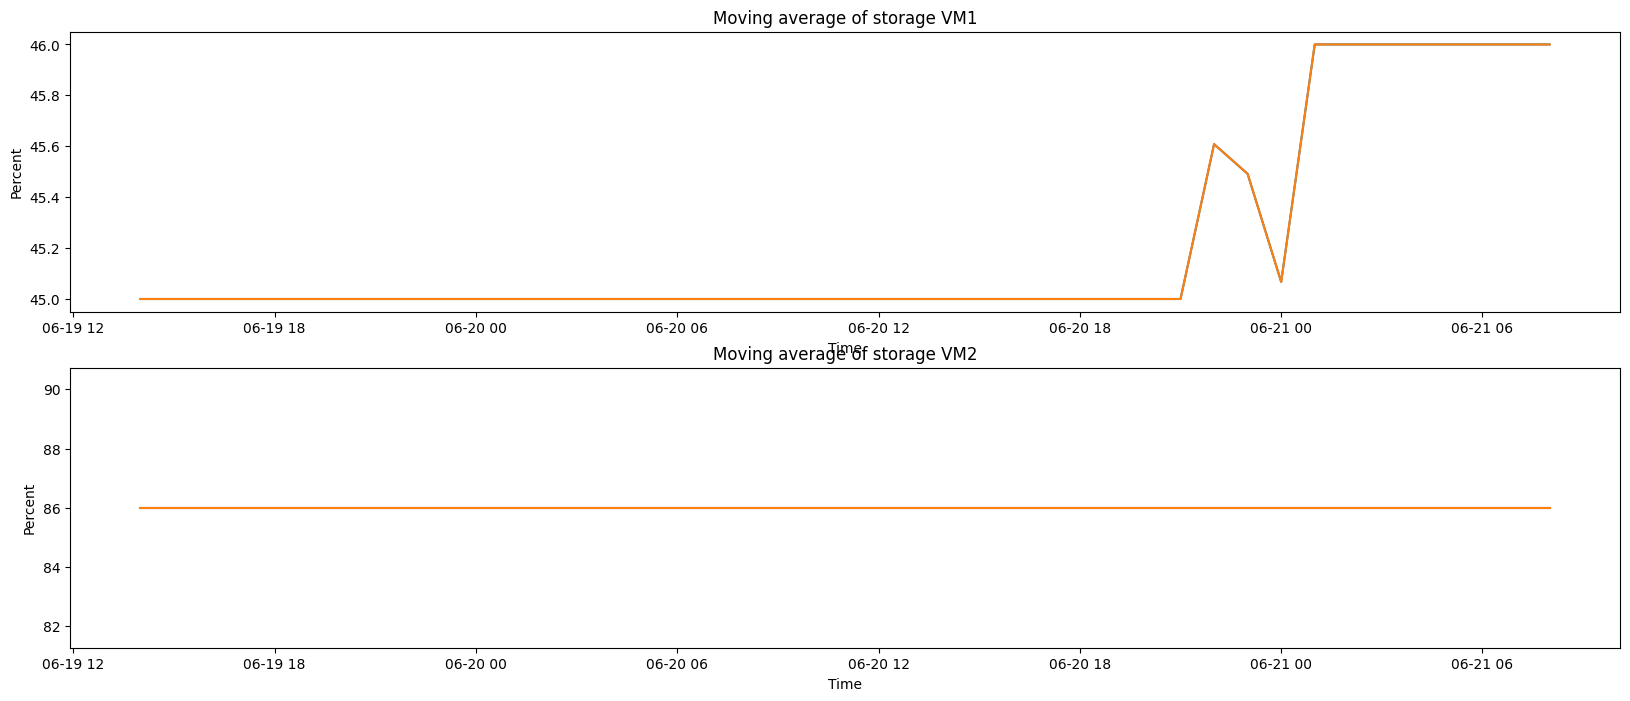

In [128]:
plt.figure(figsize=(20, 8))
n_vm =2
for i in range(0,n_vm):
    plt.subplot(n_vm,1,i+1)
    plt.plot(hour_df_filled.loc['2023-06-19 13:52:00':'21-06-23 08:59:00','storage_vm'+str(i+1)])
    plt.plot(hour_df_filled.loc['2023-06-19 13:52:00':'21-06-23 08:59:00','storage_vm'+str(i+1)])
    #plt.plot(rolling_mean['storage_vm'+str(i+1)])
    plt.xlabel('Time')
    plt.ylabel('Percent')
    #plt.legend(['actual storage','resampled storage','rolling mean trend'])
    plt.title('Moving average of storage VM'+str(i+1))

### Exam Autocorrelation 

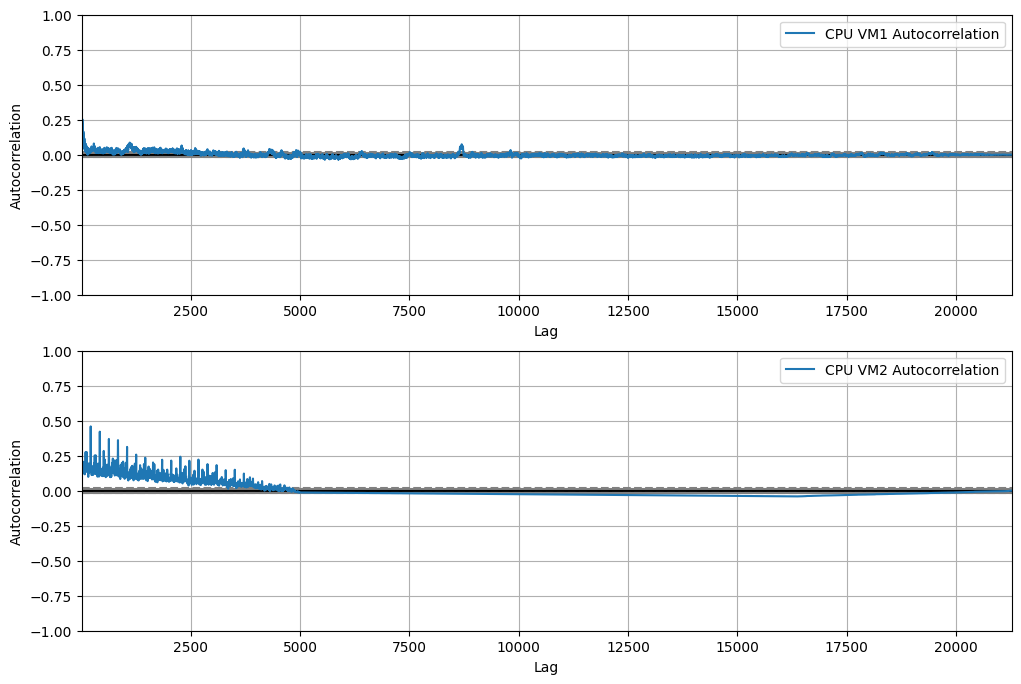

In [44]:

plt.show()
plt.figure(figsize=(12, 8))
n_vm =2
for i in range(0,n_vm):
    plt.subplot(n_vm,1,i+1)
    pd.plotting.autocorrelation_plot(clean_df['cpu_vm'+str(i+1)],label = 'CPU VM'+str(i+1)+' Autocorrelation')
#look like we have short term time series

### Get the correlation between the cpu of multi VMs.
1. method of correlation: standard correlation coefficient (Pearson method)
2. We can see storage features are non-correlated to cpu features, so we can drop this feature

In [58]:
filled_df.corr().dropna(how='all', axis=1).dropna(how='all')

,cpu_vm1,memory_vm1,storage_vm1,cpu_vm2,memory_vm2
cpu_vm1,1.000000,0.119414,0.076595,0.021044,0.022014
memory_vm1,0.119414,1.000000,0.606331,0.169677,0.176400
storage_vm1,0.076595,0.606331,1.000000,0.140183,0.111844
cpu_vm2,0.021044,0.169677,0.140183,1.000000,0.172552
memory_vm2,0.022014,0.176400,0.111844,0.172552,1.000000


1. Storage time series of VM 2 is a constant, we can remove it from dataset
2. Storage time series of VM 1 is not correlated to cpu feature, we can remove it from dataset

In [129]:
clean_df = filled_df.drop(columns=['storage_vm1','storage_vm2'])
clean_df.head()

,cpu_vm1,memory_vm1,cpu_vm2,memory_vm2
timestamp,,,,
2023-06-06 19:52:17,0.12,36.06,0.0,15.18
2023-06-06 19:52:22,0.11,35.99,0.0,15.18
2023-06-06 19:52:27,0.10,35.99,0.0,15.18
2023-06-06 19:52:40,0.09,35.98,0.0,15.18
2023-06-06 19:52:45,0.07,35.98,0.0,15.18


### Examine seasonality of multiVM's cpu time series

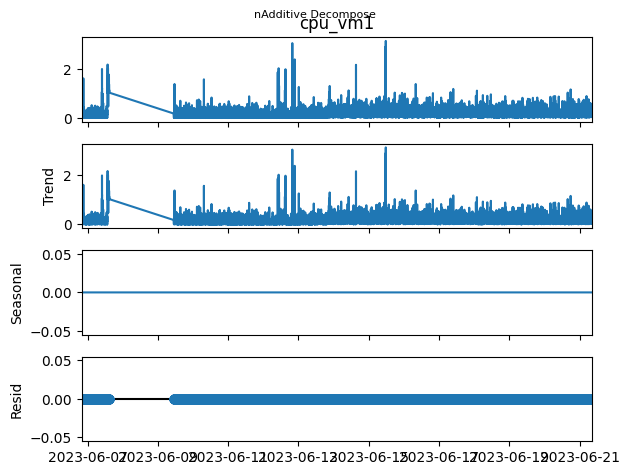

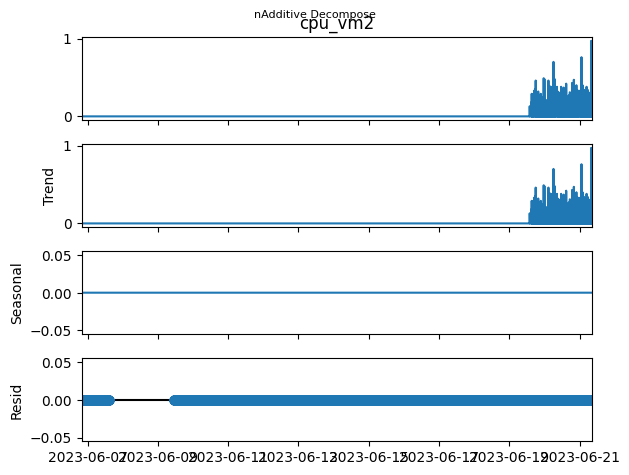

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Additive Decomposition
for i in range(n_vm):
    add_result = seasonal_decompose(filled_df['cpu_vm'+str(i+1)], model='additive',period=1)
    add_result.plot().suptitle('nAdditive Decompose', fontsize=8)


In [103]:
from statsmodels.tsa.stattools import adfuller
adfuller_result = adfuller(clean_df.cpu_vm1.values, autolag='AIC')
print(f'ADF Statistic: {adfuller_result[0]}')
print(f'p-value: {adfuller_result[1]}')
for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -13.624375596081265
p-value: 1.7716575850129907e-25
Critial Values:
   1%, -3.4306581024620346
Critial Values:
   5%, -2.8616761708932876
Critial Values:
   10%, -2.56684247997039


In [104]:
from statsmodels.tsa.stattools import adfuller
adfuller_result = adfuller(clean_df.cpu_vm2.values, autolag='AIC')
print(f'ADF Statistic: {adfuller_result[0]}')
print(f'p-value: {adfuller_result[1]}')
for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -12.114125670314449
p-value: 1.8895750502380075e-22
Critial Values:
   1%, -3.4306581024620346
Critial Values:
   5%, -2.8616761708932876
Critial Values:
   10%, -2.56684247997039


# ML Modeling for multiVM's cpu time series forecasting
## Split data ino training, validation and test dataset

In [63]:
import tensorflow as tf
import numpy as np
import os
import datetime
from tensorflow.keras.layers import Layer
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, load_model

2023-06-22 16:07:05.978956: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-22 16:07:06.035085: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-22 16:07:06.036978: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-22 16:07:07.332235: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [130]:
Minute_df = clean_df.resample('1T').mean()
nan_count = Minute_df.isna().sum()
print(nan_count)
Minute_df_filled = Minute_df.fillna(method='ffill')
nan_count = Minute_df_filled.isna().sum()
print(nan_count)

cpu_vm1       2698
memory_vm1    2698
cpu_vm2       2698
memory_vm2    2698
dtype: int64
cpu_vm1       0
memory_vm1    0
cpu_vm2       0
memory_vm2    0
dtype: int64


In [131]:
sub_df = Minute_df_filled.loc['2023-06-19 13:52:00':'21-06-23 08:59:00']

In [132]:
print('total length of non nan values in multiVM dataset:',len(sub_df))
print('check if there is nan values:',sub_df.isna().sum())

total length of non nan values in multiVM dataset: 2557
check if there is nan values: cpu_vm1       0
memory_vm1    0
cpu_vm2       0
memory_vm2    0
dtype: int64


In [152]:
n = len(sub_df)
print('length of total dataset used for ML work:',n)
train_df = sub_df[0:int(n*0.6)]
val_df = sub_df[int(n*0.6):int(n*0.9)]
test_df = sub_df[int(n*0.9):]
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

length of total dataset used for ML work: 2557
(1534, 4)
(767, 4)
(256, 4)


In [134]:
train_df[-10:]

,cpu_vm1,memory_vm1,cpu_vm2,memory_vm2
timestamp,,,,
2023-06-20 19:31:00,0.09,41.93,0.0,15.210
2023-06-20 19:32:00,0.22,41.91,0.0,15.270
2023-06-20 19:33:00,0.26,41.91,0.0,15.270
2023-06-20 19:34:00,0.09,41.92,0.0,15.210
2023-06-20 19:35:00,0.03,41.91,0.0,15.210
2023-06-20 19:36:00,0.01,41.91,0.0,15.210
2023-06-20 19:37:00,0.17,41.92,0.0,15.215
2023-06-20 19:38:00,0.15,41.92,0.0,15.220
2023-06-20 19:39:00,0.10,41.93,0.0,15.220


## We normalize data into range (0,1) for cpu, memory and storage

In [153]:
train_min = train_df.min()
print('train_min:',train_min)
train_max = train_df.max()
scaled_train = (train_df - train_min) / (train_max-train_min)
print('train_max:',train_max)
val_min = val_df.min()
val_max = val_df.max()
scaled_val = (val_df - val_min) / (val_max-val_min)
test_min = test_df.min()
test_max = test_df.max()
scaled_test = (test_df - test_min) / (test_max-test_min+0.1)

train_min: cpu_vm1        0.005
memory_vm1    41.180
cpu_vm2        0.000
memory_vm2    15.125
dtype: float64
train_max: cpu_vm1        0.890
memory_vm1    43.670
cpu_vm2        0.695
memory_vm2    15.340
dtype: float64


## Prepare the inputs and labels for training, validation and test the mode
- The model will make a set of predictions based on a window of consecutive samples from the data
###  Generate data window

In [80]:
class data_window():
    def __init__(self, input_steps, output_steps, shift, train_df, val_df, test_df, label_columns=None):
        self.train_df = train_df
        self.val_df =  val_df
        self.test_df = test_df
        self.input_steps = input_steps
        self.output_steps = output_steps
        self.shift = shift
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                    enumerate(self.label_columns)}
        self.column_indices = {name: i for i, name in
                           enumerate(self.train_df.columns)}
#         self.input_slice = slice(0, self.input_steps)
        self.total_window_steps = self.input_steps + self.shift
        self.input_indices = np.arange(self.total_window_steps)[0:self.input_steps]
        self.label_start = self.total_window_steps - self.output_steps
#         self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_steps)[self.label_start:]
    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_steps}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

### an example: generates windows 30 minutes of consecutive inputs and labels

In [156]:
w1 = data_window(30,10,10,scaled_train, scaled_val, scaled_test,label_columns=['cpu_vm1','cpu_vm2'])

In [157]:
w1.__repr__

<bound method data_window.__repr__ of Total window size: 40
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [30 31 32 33 34 35 36 37 38 39]
Label column name(s): ['cpu_vm1', 'cpu_vm2']>

### Split the data window into window of inputs and window of labels (outputs)

In [83]:
def split_window(self, features):
    inputs = features[:, :self.input_steps, :]
    labels = features[:, self.label_start:, :]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_steps, None])
    labels.set_shape([None, self.output_steps, None])

    return inputs, labels
data_window.split_window = split_window

### An example: split a batch of 3 data windows (w1) into a batch of inputs and labels

In [139]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(scaled_train[:w1.total_window_steps]),
                           np.array(scaled_train[100:100+w1.total_window_steps]),
                           np.array(scaled_train[200:200+w1.total_window_steps])])
example_inputs, example_labels = w1.split_window(example_window)
print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 40, 4)
Inputs shape: (3, 30, 4)
Labels shape: (3, 10, 2)


### Plot the window of inputs and labels and later prediction. This plot aligns inputs, labels, and (later) predictions based on the time that the item refers to

In [85]:
def plot(self, model=None, plot_col='cpu', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
#     print(len(inputs))
    max_n = max_subplots
    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col}')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index

        if label_col_index is None:
            continue

#         plt.plot(self.label_indices, labels[n, :, label_col_index],
#                 edgecolors='k', label='Labels', c='#2ca02c', s=64)
        plt.plot(self.label_indices, labels[n, :, label_col_index],
                marker='^', label='Labels')
        if model is not None:
            predictions = model(inputs)
            plt.plot(self.label_indices,  predictions[n, :, label_col_index],
                label='Predictions', marker='x')
#             plt.plot(self.label_indices, predictions[n, :, label_col_index],
#                   marker='X', edgecolors='k', label='Predictions',
#                   c='#ff7f0e', s=64)

        if n == 0:
            plt.legend()

    plt.xlabel('Time [minutes]')

data_window.plot = plot

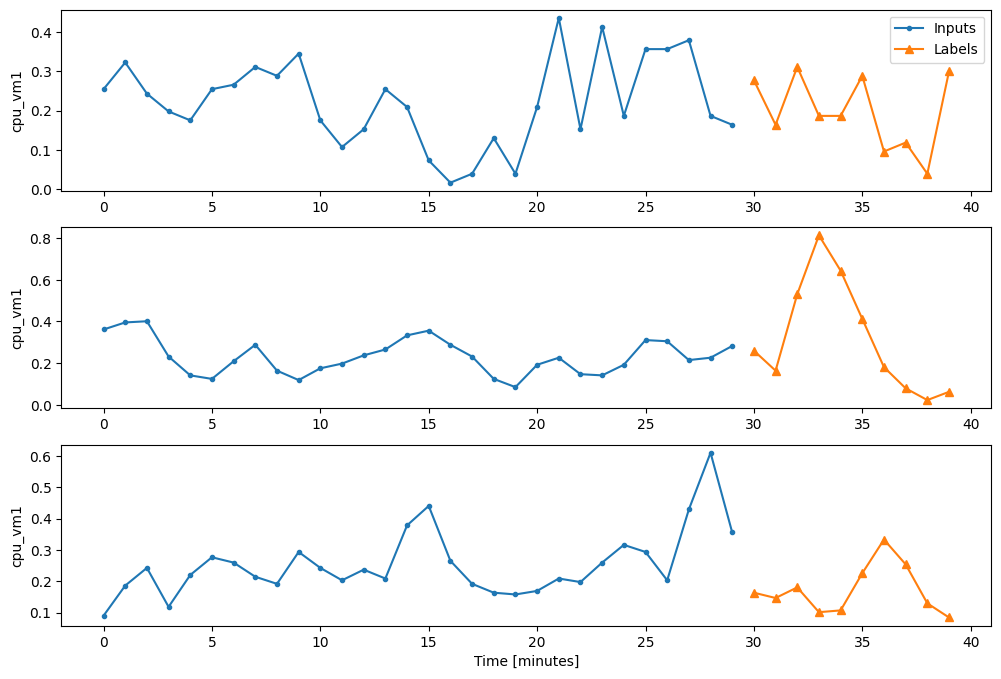

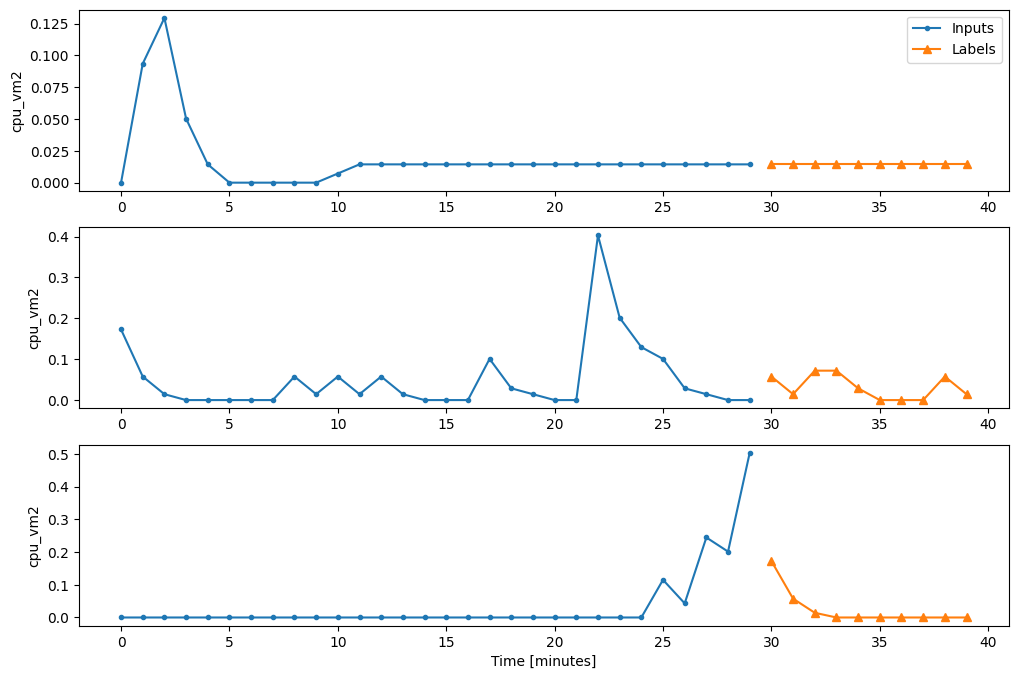

In [140]:
w1.example = example_inputs, example_labels
w1.plot(plot_col='cpu_vm1')
w1.plot(plot_col='cpu_vm2')

### Convert train, validation and test time series dataframe into a tensorflow dataset tf.data.Dataset of (input, label) pairs

In [158]:
batch_size = 32
def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_steps,
      sequence_stride=1,
      shuffle=True,
      batch_size=batch_size,)

    ds = ds.map(self.split_window)

    return ds

data_window.make_dataset = make_dataset #This allows data_window access to tf.data.dataset so that we can easily iterate over the data
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)
data_window.train = train
data_window.val = val
data_window.test = test

### Show the structure, data types, and shapes of the dataset elements

In [159]:
w1.train.element_spec
w1.train.cardinality().numpy() #total number of batch samples in training set

47

In [143]:
for example_inputs, example_labels in w1.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 30, 4)
Labels shape (batch, time, features): (32, 10, 2)


2023-06-22 18:35:18.541024: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2023-06-22 18:35:18.541525: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]


# Train the model
- A recurrent model can learn to use a long history of inputs, here we create a recurrent model to use last 30 mins to predict for next  10 minutes in a single shot
- set mean square error as loss function
- use adam optimizer
- use metric: mean absolute error

In [160]:
def compile_and_fit(model, window, patience=15):
        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                        patience=patience,
                                                        mode='min')

        model.compile(loss=tf.keras.losses.MeanSquaredError(),
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=[tf.keras.metrics.MeanAbsoluteError()])

        history = model.fit(window.train, epochs=MAX_EPOCHS,
                          validation_data=window.val,verbose=1,callbacks=[early_stopping])
        return history

### Create a mlflow run
- log the run of model training into mlflow server
- log all useful paramters of model and setting of data window

![Register Model in MLFlow](./Images/MLflow1.png)

In [161]:
import mlflow
os.environ["AWS_ACCESS_KEY_ID"] = "minioadmin"
os.environ["AWS_SECRET_ACCESS_KEY"] = "minioadmin"
os.environ["MLFLOW_S3_ENDPOINT_URL"] = f"http://sparkjupyter-minio-1:9000"

import mlflow.tensorflow
mlflow.set_tracking_uri("http://mlflowremote:5000")
mlflow.autolog()
with mlflow.start_run() as run:
    input_steps = 30
    output_steps = 10
    shift = 10
    label_columns = ['cpu_vm1','cpu_vm2']
    num_features = len(label_columns)
    MAX_EPOCHS = 200
    multi_performance = {}
    new_window = data_window(input_steps,output_steps,shift,scaled_train, scaled_val, scaled_test,label_columns=['cpu_vm1','cpu_vm2'])
    new_window.__repr__
    lstm_unit = 32
    lstm_model = tf.keras.Sequential([
        # Shape [batch, time, features] => [batch, lstm_units]
        tf.keras.layers.LSTM(lstm_unit, return_sequences=False),
        # Shape => [batch, out_steps*features].
        tf.keras.layers.Dense(output_steps*num_features,
                              kernel_initializer=tf.initializers.zeros()),
        # Shape => [batch, out_steps, features].
        tf.keras.layers.Reshape([output_steps, num_features])
    ])
    
    history_lstm = compile_and_fit(lstm_model,new_window)
    lstm_model.summary()
    
    multi_performance['LSTM'] = lstm_model.evaluate(new_window.test, verbose=0)
    metric_index = lstm_model.metrics_names.index('mean_absolute_error')
    mae_for_testset = [v[metric_index] for v in multi_performance.values()]
    print('mae metric:'.format(mae_for_testset))
    #log model
    mlflow.tensorflow.log_model(lstm_model, "lstm_model_multiVM")
    # log metric
    mlflow.log_metric('mae for testset', np.array(mae_for_testset))
     # Log parameters
    mlflow.log_param("input steps", input_steps)
    mlflow.log_param("output steps", output_steps)
    mlflow.log_param("shift", shift)
    mlflow.log_param("lstm unit", lstm_unit)
    print("Run ID: {}".format(run.info.run_id))
    mlflow.end_run(status='FINISHED')

2023/06/22 18:55:57 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2023/06/22 18:55:57 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of statsmodels. If you encounter errors during autologging, try upgrading / downgrading statsmodels to a supported version, or try upgrading MLflow.
2023/06/22 18:55:57 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2023/06/22 18:55:57 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during spark autologging: Exception while attempting to initialize JVM-side state for Spark datasource autologging. Please create a new Spark session and ensure you have the mlflow-spark JAR attached to your Spark session as described in http://mlflow.org/docs/latest/tracking.html#automatic-logging-from-spark-experimental. Exception:
'JavaPackage' object is not callable
2023/06/22 18:55:57 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during

Epoch 1/200


2023-06-22 18:55:57.948451: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2023-06-22 18:55:57.950231: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2023-06-22 18:55:58.218706: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node grad

47/47 [==============================] - ETA: 0s - loss: 0.0209 - mean_absolute_error: 0.0981

2023-06-22 18:56:00.716047: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [767,4]
	 [[{{node Placeholder/_0}}]]
2023-06-22 18:56:00.716706: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [767,4]
	 [[{{node Placeholder/_0}}]]
2023-06-22 18:56:00.928194: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' 

47/47 [==============================] - 3s 24ms/step - loss: 0.0209 - mean_absolute_error: 0.0981 - val_loss: 0.0181 - val_mean_absolute_error: 0.0942
Epoch 2/200
47/47 [==============================] - 1s 13ms/step - loss: 0.0139 - mean_absolute_error: 0.0820 - val_loss: 0.0179 - val_mean_absolute_error: 0.0912
Epoch 3/200
47/47 [==============================] - 1s 13ms/step - loss: 0.0138 - mean_absolute_error: 0.0814 - val_loss: 0.0180 - val_mean_absolute_error: 0.0908
Epoch 4/200
47/47 [==============================] - 1s 15ms/step - loss: 0.0138 - mean_absolute_error: 0.0813 - val_loss: 0.0177 - val_mean_absolute_error: 0.0917
Epoch 5/200
47/47 [==============================] - 1s 15ms/step - loss: 0.0138 - mean_absolute_error: 0.0814 - val_loss: 0.0179 - val_mean_absolute_error: 0.0904
Epoch 6/200
47/47 [==============================] - 1s 14ms/step - loss: 0.0138 - mean_absolute_error: 0.0811 - val_loss: 0.0177 - val_mean_absolute_error: 0.0915
Epoch 7/200
47/47 [=========

2023-06-22 18:56:39.246690: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [1495]
	 [[{{node Placeholder/_8}}]]
2023-06-22 18:56:39.247207: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1534,4]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 0s 362ms/step


2023-06-22 18:56:39.563001: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-22 18:56:39.564773: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-22 18:56:39.566573: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-06-22 18:56:41.226663: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-22 18:56:41.228135: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-22 18:56:41.229890: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-06-22 18:56:42.394011: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,20]
	 [[{{node inputs}}]]
2023-06-22 18:56:42.470423: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'serving_default_lstm_3_input' with dtype float and shape [?,30,4]
	 [[{{node serving_default_lstm_3_input}}]]


INFO:tensorflow:Assets written to: /tmp/tmp5clf7yst/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp5clf7yst/model/data/model/assets


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 32)                4736      
                                                                 
 dense_3 (Dense)             (None, 20)                660       
                                                                 
 reshape_3 (Reshape)         (None, 10, 2)             0         
                                                                 
Total params: 5,396
Trainable params: 5,396
Non-trainable params: 0
_________________________________________________________________


2023-06-22 18:56:48.546858: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [256,4]
	 [[{{node Placeholder/_0}}]]
2023-06-22 18:56:48.547278: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2023/06/22 18:56:48 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


mae metric:


2023-06-22 18:56:48.831137: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-22 18:56:48.832637: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-22 18:56:48.834203: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-06-22 18:56:50.085073: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-22 18:56:50.086471: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-22 18:56:50.087759: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-06-22 18:56:51.297219: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'serving_default_lstm_3_input' with dtype float and shape [?,30,4]
	 [[{{node serving_default_lstm_3_input}}]]


INFO:tensorflow:Assets written to: /tmp/tmp6cpxxmjn/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp6cpxxmjn/model/data/model/assets
2023/06/22 18:56:58 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during spark autologging: Exception while attempting to initialize JVM-side state for Spark datasource autologging. Please create a new Spark session and ensure you have the mlflow-spark JAR attached to your Spark session as described in http://mlflow.org/docs/latest/tracking.html#automatic-logging-from-spark-experimental. Exception:
'JavaPackage' object is not callable
2023/06/22 18:56:58 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during spark autologging: Exception while attempting to initialize JVM-side state for Spark datasource autologging. Please create a new Spark session and ensure you have the mlflow-spark JAR attached to your Spark session as described in http://mlflow.org/docs/latest/tracking.html#automatic-logging-from-spark-experimental. Exception:
'JavaPackage' object is not callable


Run ID: cf0be319a5bf466c92f9c4172f29b520


### Show the training history vs epoch

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


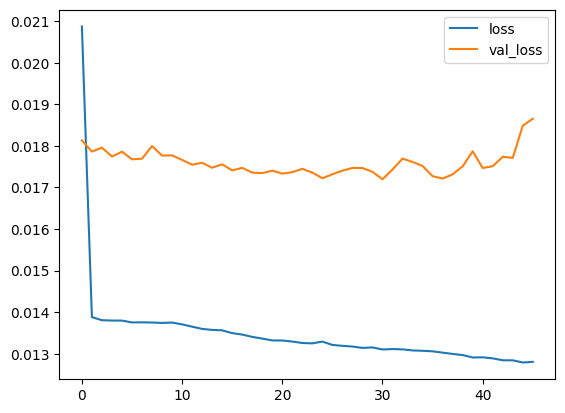

In [162]:
print(history_lstm.history.keys())
plt.plot(history_lstm.history['loss'],label='loss')
plt.plot(history_lstm.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
#we can see the overfitting here

In [168]:
def plot_prediction(self, model=None, plot_col='cpu', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
#     print(len(inputs))
    max_n = max_subplots
    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col}')
#         plt.plot(self.input_indices, inputs[n, :, plot_col_index],
#              label='Inputs', marker='.', zorder=-10)

        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index

        if label_col_index is None:
            continue

#         plt.plot(self.label_indices, labels[n, :, label_col_index],
#                 edgecolors='k', label='Labels', c='#2ca02c', s=64)
        plt.plot(self.label_indices, labels[n, :, label_col_index],
                marker='^', label='Labels')
        if model is not None:
            predictions = model(inputs)
            plt.plot(self.label_indices,  predictions[n, :, label_col_index],
                label='Predictions', marker='x')
#             plt.plot(self.label_indices, predictions[n, :, label_col_index],
#                   marker='X', edgecolors='k', label='Predictions',
#                   c='#ff7f0e', s=64)

        if n == 0:
            plt.legend()

    plt.xlabel('Time [minutes]')
data_window.plot_prediction = plot_prediction

# Show the predictions vs labels using trained model

2023-06-27 19:07:39.082581: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2023-06-27 19:07:39.083144: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [217]
	 [[{{node Placeholder/_8}}]]


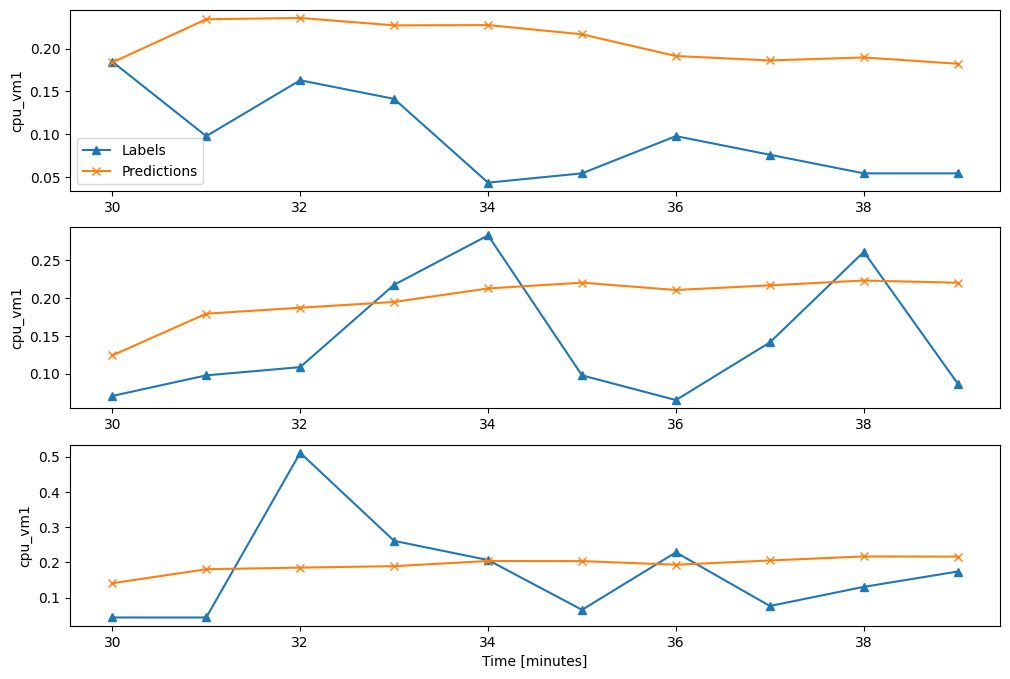

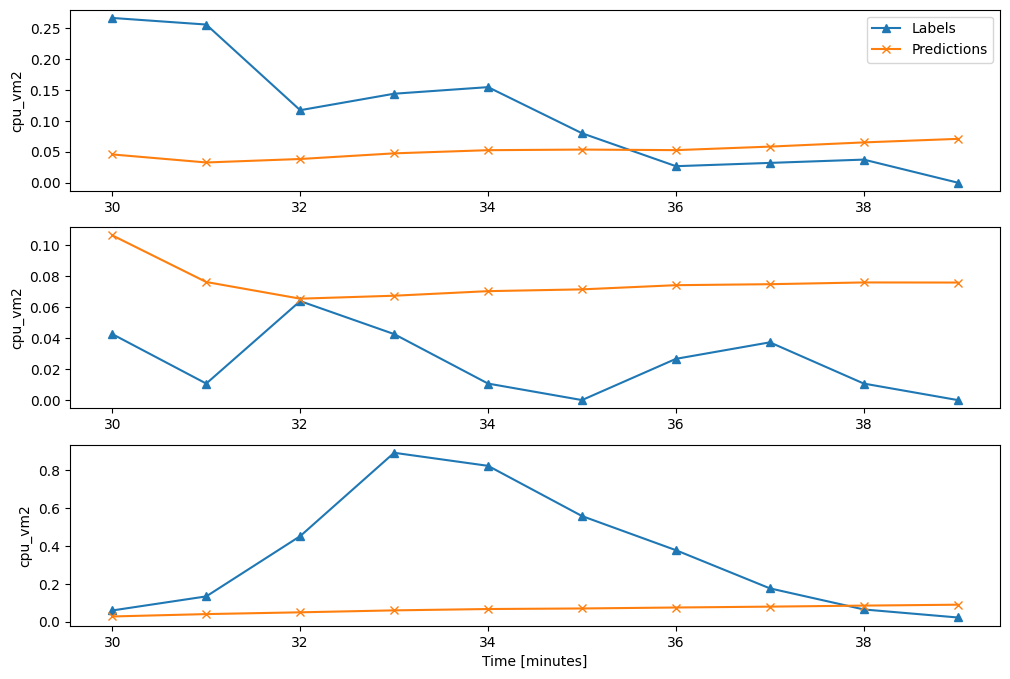

In [169]:
for example_inputs, example_labels in new_window.test.take(1):
    new_window.example = example_inputs, example_labels
    new_window.plot_prediction(lstm_model,plot_col='cpu_vm1')
    new_window.plot_prediction(lstm_model,plot_col='cpu_vm2')